<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [61]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import squarify

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [3]:
from bs4 import BeautifulSoup
import requests

##### Your Code Here #####
# raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")

df = pd.read_csv('data/job_listings.csv')
del df['Unnamed: 0']
df.head()

,description,title
0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [4]:
def clean(text):
    soup = BeautifulSoup(text, 'html')
    x = soup.get_text()[2:]
    x = re.sub(r'\\n', '', x)
    x = re.sub(r'\\x..', '', x)
    return x

In [5]:
df.description = df['description'].apply(clean)

In [6]:
df.head()

,description,title
0,Job Requirements:Conceptual understanding in M...,Data scientist
1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist
4,Location: USA multiple locations2+ years of A...,Data Scientist


## 2) Use Spacy to tokenize the listings 

In [7]:
from tqdm import tqdm
tqdm.pandas()
nlp = spacy.load("en_core_web_lg")

C:\Users\keith\.conda\envs\U4-S1-NLP\lib\site-packages\tqdm\std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [8]:
def get_lemmas(text):
    
    text = re.sub('[^a-zA-Z ]', '', text)
    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [9]:
words = df['description'].apply(get_lemmas)
words


0      [job, RequirementsConceptual, understanding, M...
1      [job, DescriptionAs, Data, scientist,  , help,...
2      [Data, scientist, work, consult, business, res...
3      [   , monthContractUnder, general, supervision...
4      [location, USA,  , multiple, location, year, A...
                             ...                        
421    [UsWant, fantastic, fun, startup, s, revolutio...
422    [InternshipAt, uber, ignite, opportunity, set,...
423    [   , yearA, million, people, year, die, car, ...
424    [senior, data, SCIENTISTJOB, DESCRIPTIONABOUT,...
425    [Cerner, Intelligence, new, innovative, organi...
Name: description, Length: 426, dtype: object

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [10]:
df['lemmas'] = df['description'].progress_apply(get_lemmas)
df.head()

100%|████████████████████████████████████████████████████████████████████████████████| 426/426 [00:18<00:00, 22.57it/s]


,description,title,lemmas
0,Job Requirements:Conceptual understanding in M...,Data scientist,"[job, RequirementsConceptual, understanding, M..."
1,"Job DescriptionAs a Data Scientist 1, you will...",Data Scientist I,"[job, DescriptionAs, Data, scientist, , help,..."
2,As a Data Scientist you will be working on con...,Data Scientist - Entry Level,"[Data, scientist, work, consult, business, res..."
3,"$4,969 - $6,756 a monthContractUnder the gener...",Data Scientist,"[ , monthContractUnder, general, supervision..."
4,Location: USA multiple locations2+ years of A...,Data Scientist,"[location, USA, , multiple, location, year, A..."


In [29]:
#word count
from collections import Counter
# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['lemmas'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(10)

[('datum', 2611),
 (' ', 1663),
 ('work', 1359),
 ('team', 1188),
 ('experience', 1135),
 ('business', 1081),
 ('model', 805),
 ('Data', 760),
 ('product', 742),
 ('data', 692)]

In [15]:
cv = CountVectorizer(max_features = 500,
                        tokenizer=get_lemmas
#                         ngram_range=(1,2)
#                         max_df=.97,
#                         min_df=3,
#                         tokenizer=tokenize
                       )

# Create a vocabulary and get word counts per document
dtm = cv.fit_transform(df.description) # Similiar to fit_predict

# Print word counts

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=cv.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,,ab,ability,able,access,accommodation,achieve,action,actionable,activity,...,want,way,well,wide,will,work,workplace,world,write,year
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,4,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,4,0,1,2,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## 4) Visualize the most common word counts

In [55]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [58]:
# Use the Function
wc = count(df['lemmas'])
print(wc.shape)
wc.head()

(15014, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
49,datum,406,2611,1.0,0.020957,0.020957,0.953052
14,,369,1663,2.0,0.013348,0.034305,0.866197
48,work,362,1359,3.0,0.010908,0.045213,0.849765
314,team,359,1188,4.0,0.009535,0.054748,0.842723
69,experience,369,1135,5.0,0.009110,0.063858,0.866197


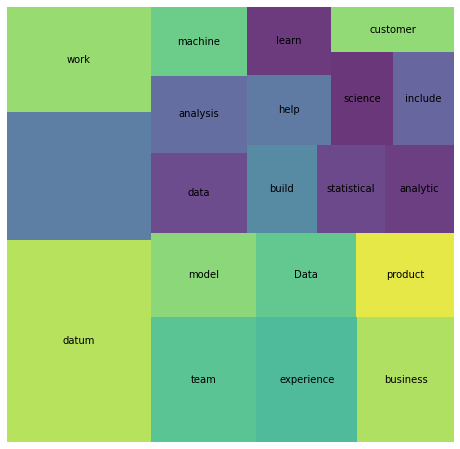

In [62]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [136]:
tfidf = TfidfVectorizer(tokenizer=get_lemmas, max_features=300)
dtm2 = tfidf.fit_transform(df['description'])
dtm2 = pd.DataFrame(dtm2.todense(), columns=tfidf.get_feature_names())
dtm2.head()

,,ability,able,achieve,actionable,advanced,age,algorithm,analysis,analytic,...,vision,visualization,want,way,well,will,work,world,write,year
0,0.100863,0.158737,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.102548,0.000000,0.177055,0.000000
1,0.139588,0.054921,0.0,0.0,0.000000,0.000000,0.000000,0.062051,0.0,0.0,...,0.0,0.0,0.0,0.070039,0.0,0.0,0.141920,0.058278,0.122517,0.040794
2,0.000000,0.000000,0.0,0.0,0.187223,0.145696,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.082498,0.000000,0.000000,0.000000
3,0.054682,0.000000,0.0,0.0,0.000000,0.000000,0.115382,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.111190,0.000000,0.000000,0.000000
4,0.217568,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.254333


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [137]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm2)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [138]:
dtm2.shape

(426, 300)

In [162]:
ideal_job = ["Python, Entry Level"]
new = tfidf.transform(ideal_job)

In [163]:
results = nn.kneighbors(new.todense())

In [164]:
results[1][0][0]

336

In [167]:
df["description"][results[1][0][0]]

"Discover business insights, identify opportunities and provide solutions and recommendations to solve business problems through the use of statistical, algorithmic, data mining and visualization techniques.Level 1Under close supervision, conduct predictive analyses for population health management, marketing campaign management and forecasting,Analyze and design solutions using healthcare dataWork with datasets of varying degrees of size and complexity including both structured and unstructured dataAnalyze and mine multiple data sources to select statistically valid data samplesBuild, test and implement machine learning models by investigating appropriate methods and algorithms Develop analytical datasets and transform fields from data sources as necessary for modelingWork with other departments to develop research plans to match company goalsStrategize on approaches to develop robust and meaningful analytics Prepare and co-present reports of model performance and business recommendat

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 